ДЗ_26 Бенатович Е.Ю.

Решить задачу просрочки кредита, используя для прогнозирования нейронные сети. 

Посмотреть работу с несбалансированными сетями.

Модель 1 
2 слоя Dense auc 83.2%

Модель 2
3 слоя Dense auc 83.3%

Модель 3 
4 слоя Dense auc 83.4%


In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('cs-training.csv')

In [3]:
df.shape

(150000, 12)

In [4]:
df.tail(8).T

,149992,149993,149994,149995,149996,149997,149998,149999
Unnamed: 0,149993.000000,149994.0,149995.000000,149996.000000,149997.000000,149998.000000,149999.0,150000.000000
SeriousDlqin2yrs,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
RevolvingUtilizationOfUnsecuredLines,0.871976,1.0,0.385742,0.040674,0.299745,0.246044,0.0,0.850283
age,50.000000,22.0,50.000000,74.000000,44.000000,58.000000,30.0,64.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
DebtRatio,4132.000000,0.0,0.404293,0.225131,0.716562,3870.000000,0.0,0.249908
MonthlyIncome,NaN,820.0,3400.000000,2100.000000,5584.000000,NaN,5716.0,8158.000000
NumberOfOpenCreditLinesAndLoans,11.000000,1.0,7.000000,4.000000,4.000000,18.000000,4.0,8.000000
NumberOfTimes90DaysLate,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
NumberRealEstateLoansOrLines,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,2.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents']=df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [9]:
input=['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
      'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
      'NumberOfDependents']
output=['SeriousDlqin2yrs']

In [10]:
df_input=df[input]
df_output=df[output]

In [11]:
df[output].value_counts() #количество вернувших и не вернувших кредит

SeriousDlqin2yrs
0                   139974
1                    10026
dtype: int64

In [14]:
scaler = StandardScaler()
df_input=scaler.fit_transform(df_input)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=102) #делим на тестовую и тренировочную 

In [18]:
X_train.shape

(112500, 11)

In [19]:
X_test.shape

(37500, 11)

In [20]:
tf.__version__

'2.10.1'

In [21]:
keras.__version__

'2.10.0'

In [22]:
tf.keras.backend.clear_session()
np.random.seed(102)
tf.random.set_seed(102)

In [23]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=30,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

Модель 1

In [24]:
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1, activation="sigmoid", dtype=tf.float64)
])

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [30]:
physical_devices = tf.config.list_physical_devices('GPU')

In [31]:
model1.compile(loss=keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.Adam(learning_rate=0.005), 
              metrics=keras.metrics.AUC())

In [32]:
history=model1.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=500, callbacks=callbacks)


Epoch 1/15
225/225 [==============================] - 4s 10ms/step - loss: 0.2564 - auc: 0.6845 - val_loss: 0.1974 - val_auc: 0.8025
Epoch 2/15
225/225 [==============================] - 2s 8ms/step - loss: 0.1948 - auc: 0.8171 - val_loss: 0.1908 - val_auc: 0.8209
Epoch 3/15
225/225 [==============================] - 2s 8ms/step - loss: 0.1917 - auc: 0.8253 - val_loss: 0.1894 - val_auc: 0.8226
Epoch 4/15
225/225 [==============================] - 2s 8ms/step - loss: 0.1905 - auc: 0.8259 - val_loss: 0.1886 - val_auc: 0.8249
Epoch 5/15
225/225 [==============================] - 2s 9ms/step - loss: 0.1897 - auc: 0.8287 - val_loss: 0.1881 - val_auc: 0.8261
Epoch 6/15
225/225 [==============================] - 2s 9ms/step - loss: 0.1891 - auc: 0.8298 - val_loss: 0.1881 - val_auc: 0.8303
Epoch 7/15
225/225 [==============================] - 2s 8ms/step - loss: 0.1889 - auc: 0.8307 - val_loss: 0.1874 - val_auc: 0.8278
Epoch 8/15
225/225 [==============================] - 2s 8ms/step - loss: 0

In [33]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

In [34]:
model1.evaluate(X_test, y_test, verbose=0)

[0.18684029579162598, 0.8320748209953308]

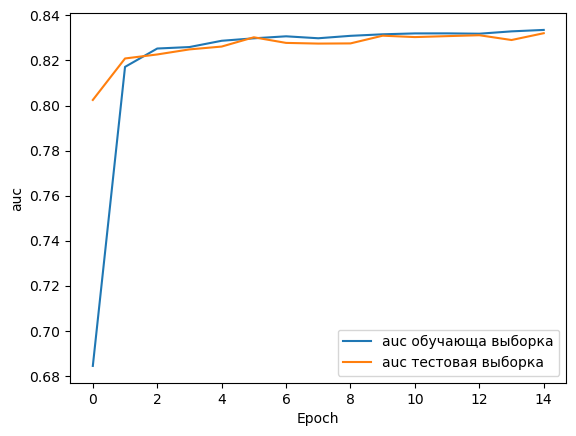

In [35]:
plt.plot(history.history['auc'], label='auc обучающа выборка')
plt.plot(history.history['val_auc'], label='auc тестовая выборка')
#plt.plot(history.history['loss'], label='Оценка точности - обучающа выборка')
#plt.plot(history.history['val_loss'], label='Оценка точности - тестовая выборка')
plt.xlabel('Epoch')
plt.ylabel('auc')
plt.legend()
plt.show()

Модель 2

In [36]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid", dtype=tf.float64)
])

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                360       
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.compile(loss=keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              metrics=keras.metrics.AUC())

In [39]:
%%time
history=model2.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=1000, callbacks=callbacks)

Epoch 1/15
113/113 [==============================] - 2s 12ms/step - loss: 0.2518 - auc_1: 0.7019 - val_loss: 0.1938 - val_auc_1: 0.8136
Epoch 2/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1931 - auc_1: 0.8214 - val_loss: 0.1884 - val_auc_1: 0.8258
Epoch 3/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1900 - auc_1: 0.8276 - val_loss: 0.1874 - val_auc_1: 0.8280
Epoch 4/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1890 - auc_1: 0.8296 - val_loss: 0.1871 - val_auc_1: 0.8285
Epoch 5/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1885 - auc_1: 0.8310 - val_loss: 0.1869 - val_auc_1: 0.8304
Epoch 6/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1881 - auc_1: 0.8322 - val_loss: 0.1867 - val_auc_1: 0.8319
Epoch 7/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1881 - auc_1: 0.8320 - val_loss: 0.1864 - val_auc_1: 0.8307
Epoch 8/15
113/113 [===========================

In [45]:
model2.evaluate(X_test, y_test, verbose=0)

[0.18681977689266205, 0.8333338499069214]

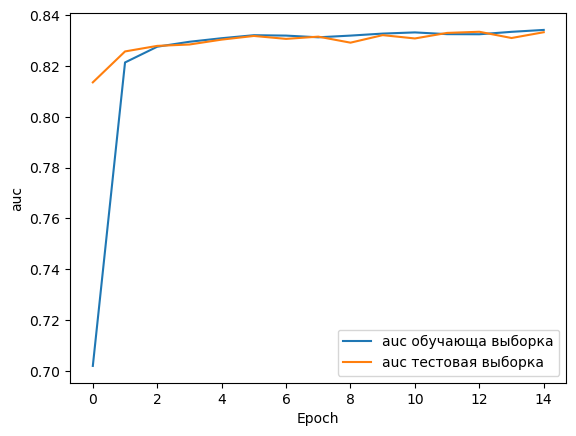

In [40]:
plt.plot(history.history['auc_1'], label='auc обучающа выборка')
plt.plot(history.history['val_auc_1'], label='auc тестовая выборка')
#plt.plot(history.history['loss'], label='Оценка точности - обучающа выборка')
#plt.plot(history.history['val_loss'], label='Оценка точности - тестовая выборка')
plt.xlabel('Epoch')
plt.ylabel('auc')
plt.legend()
plt.show()

Модель 3

In [41]:
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid", dtype=tf.float64)
])

In [47]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


In [42]:
model3.compile(loss=keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.Adam(learning_rate=0.005), 
              metrics=keras.metrics.AUC())

In [43]:
%%time
history=model3.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=1000, callbacks=callbacks)

Epoch 1/15
113/113 [==============================] - 3s 15ms/step - loss: 0.2287 - auc_2: 0.7433 - val_loss: 0.1886 - val_auc_2: 0.8255
Epoch 2/15
113/113 [==============================] - 1s 10ms/step - loss: 0.1909 - auc_2: 0.8249 - val_loss: 0.1878 - val_auc_2: 0.8292
Epoch 3/15
113/113 [==============================] - 1s 10ms/step - loss: 0.1891 - auc_2: 0.8306 - val_loss: 0.1869 - val_auc_2: 0.8317
Epoch 4/15
113/113 [==============================] - 1s 10ms/step - loss: 0.1883 - auc_2: 0.8318 - val_loss: 0.1865 - val_auc_2: 0.8328
Epoch 5/15
113/113 [==============================] - 1s 10ms/step - loss: 0.1880 - auc_2: 0.8321 - val_loss: 0.1865 - val_auc_2: 0.8309
Epoch 6/15
113/113 [==============================] - 1s 10ms/step - loss: 0.1875 - auc_2: 0.8341 - val_loss: 0.1858 - val_auc_2: 0.8347
Epoch 7/15
113/113 [==============================] - 1s 9ms/step - loss: 0.1875 - auc_2: 0.8342 - val_loss: 0.1877 - val_auc_2: 0.8331
Epoch 8/15
113/113 [======================

In [46]:
model3.evaluate(X_test, y_test, verbose=0)

[0.1856301873922348, 0.8349130749702454]

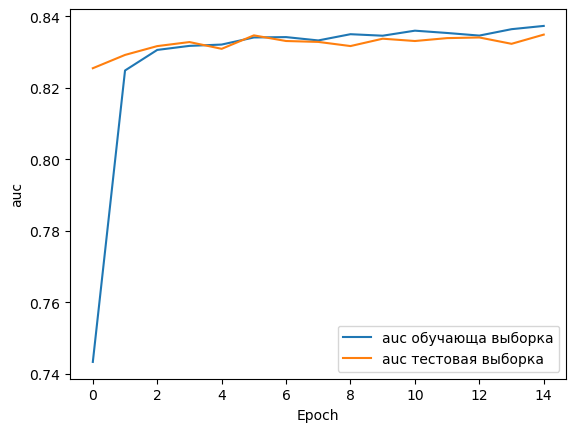

In [44]:
plt.plot(history.history['auc_2'], label='auc обучающа выборка')
plt.plot(history.history['val_auc_2'], label='auc тестовая выборка')
#plt.plot(history.history['loss'], label='Оценка точности - обучающа выборка')
#plt.plot(history.history['val_loss'], label='Оценка точности - тестовая выборка')
plt.xlabel('Epoch')
plt.ylabel('auc')
plt.legend()
plt.show()